In [43]:
import numpy as np
import scipy
from scipy import stats
import pandas as pd
import seaborn as sns
data1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heartdata/heart.csv")
data1.info()
data1.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(1025, 14)

In [44]:
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

#Removing the duplicate row
data1 = data1.drop_duplicates()
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows after correction:: ", duplicate_rows.shape)
#Number of duplicate rows after dropping one duplicate row
#Looking for null values
print("Null values :: ")
print(data1.isnull() .sum())
#Check if the other data is consistent
data1.shape
#As there are no null values in data, we can proceed with the next steps.

Number of duplicate rows ::  (723, 14)
Number of duplicate rows after correction::  (0, 14)
Null values :: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


(302, 14)

*********** InterQuartile Range ***********
age         13.00
sex          1.00
cp           2.00
trestbps    20.00
chol        63.75
fbs          0.00
restecg      1.00
thalach     32.75
exang        1.00
oldpeak      1.60
slope        1.00
ca           1.00
thal         1.00
target       1.00
dtype: float64


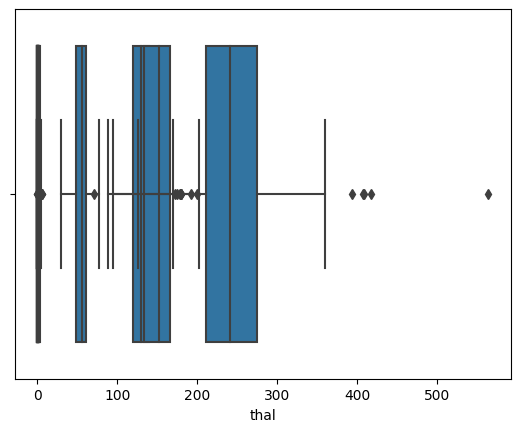

In [45]:
#Detecting Outliers
# 1. Detecting Outliers using IQR (InterQuartile Range)
sns.boxplot(x=data1['age'])
#No Outliers observed in 'age'
sns.boxplot(x=data1['sex'])
#No outliers observed in sex data
sns.boxplot(x=data1['cp'])

#No outliers in 'cp'
sns.boxplot(x=data1['trestbps'])
#Some outliers are observed in 'trtbps'. They will be removed later
sns.boxplot(x=data1['chol'])
#Some outliers are observed in 'chol'. They will be removed later
sns.boxplot(x=data1['fbs'])
sns.boxplot(x=data1['restecg'])
sns.boxplot(x=data1['thalach'])
#Outliers present in thalachh
sns.boxplot(x=data1['exang'])
sns.boxplot(x=data1['oldpeak'])
#Outliers are present in 'OldPeak'
sns.boxplot(x=data1['slope'])
sns.boxplot(x=data1['ca'])
#Outliers are present in 'caa'
sns.boxplot(x=data1['thal'])
#Find the InterQuartile Range
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)

In [46]:
# Remove the outliers using IQR
data2 = data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)]
data2.shape

(228, 14)

In [47]:
#Removing outliers using Z-score
z = np.abs(stats.zscore(data1))
data3 = data1[(z<3).all(axis=1)]
data3.shape

(287, 14)

Text(0.5, 1.0, 'Pearson Correlation')

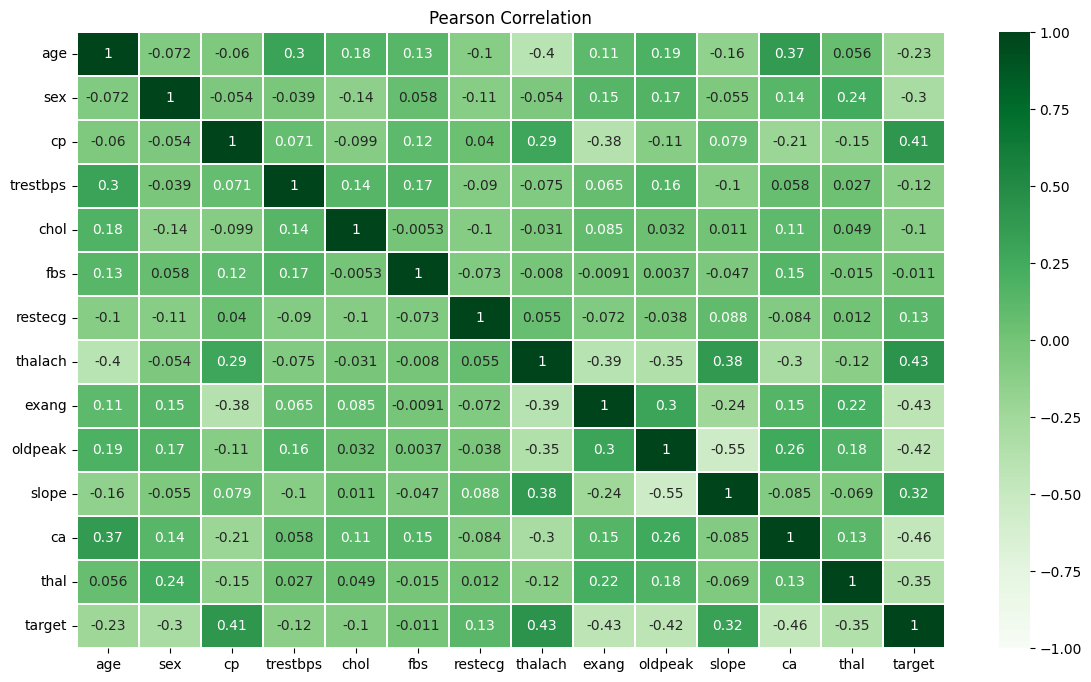

In [48]:
from matplotlib import pyplot as plt
pearsonCorr = data3.corr(method='pearson')
spearmanCorr = data3.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")


Text(0.5, 1.0, 'Pearson Correlation')

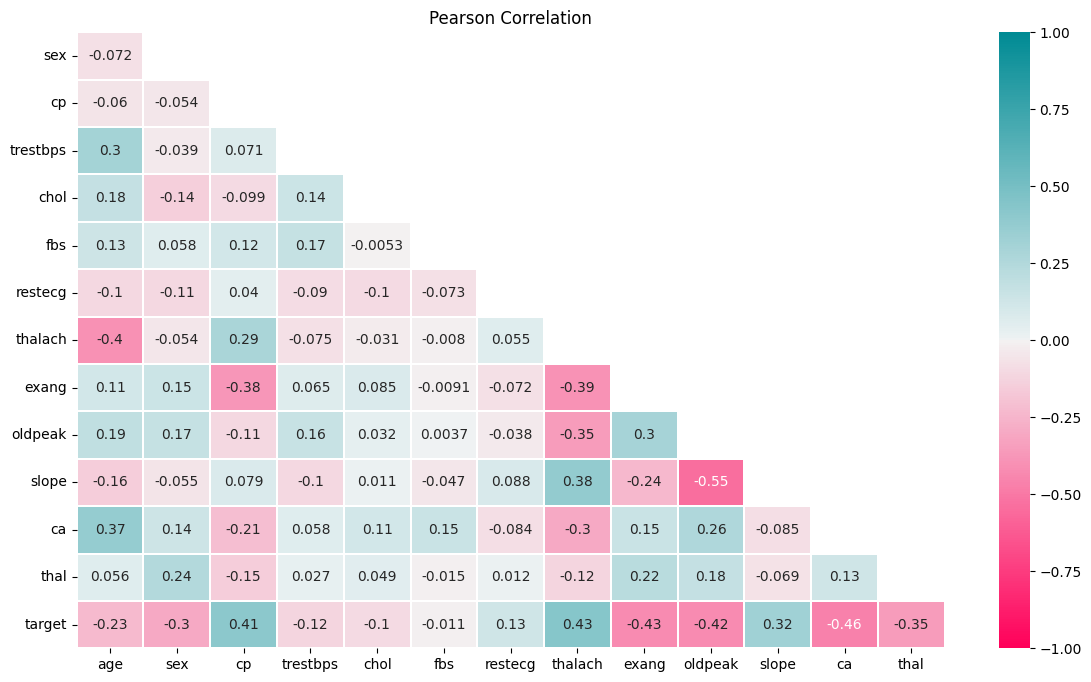

In [49]:
#Create mask for both correlation matrices
#Pearson corr masking
#Generating mask for upper triangle
maskP = np.triu(np.ones_like(pearsonCorr,dtype=bool))
#Adjust mask and correlation
maskP = maskP[1:,:-1]
pCorr = pearsonCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 200, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskP)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

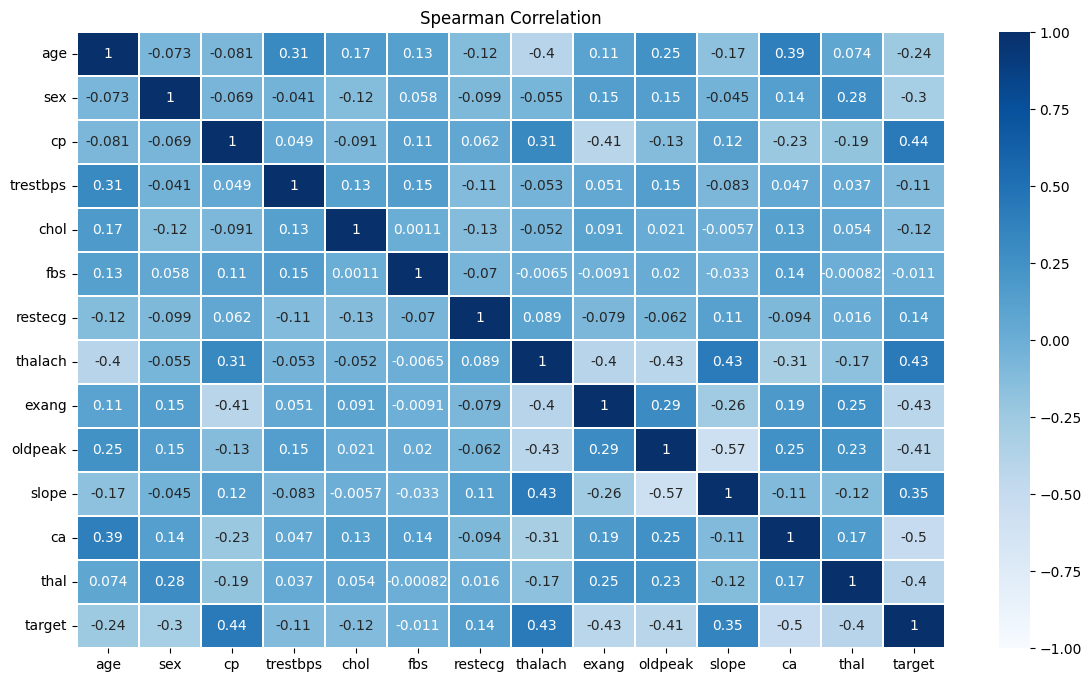

In [50]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

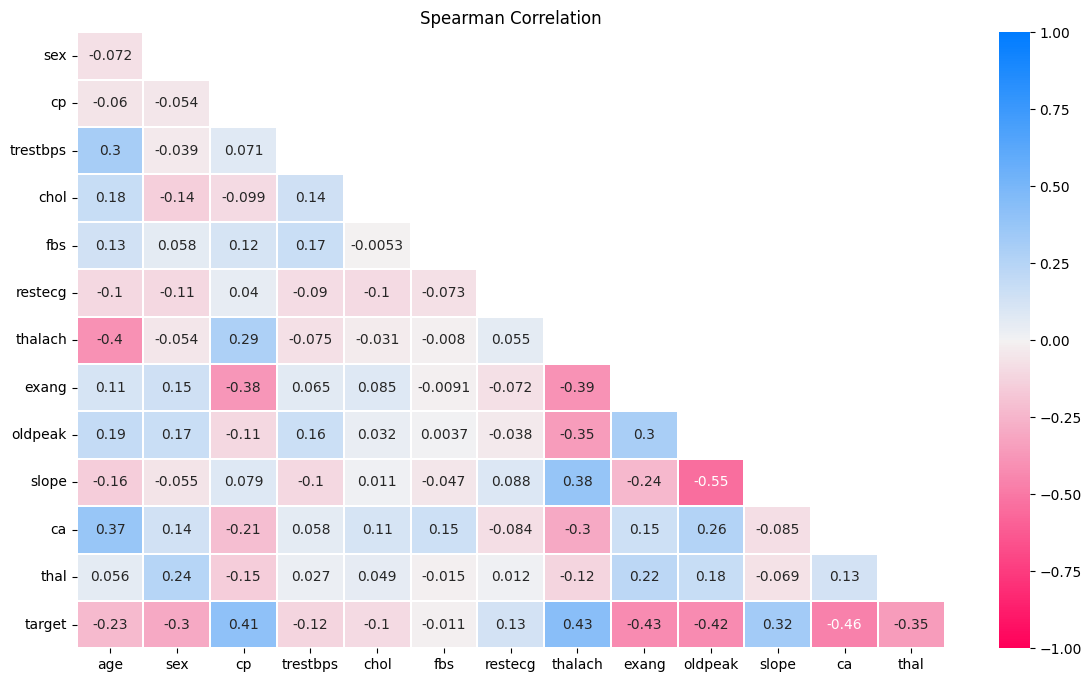

In [51]:
#Create mask for both correlation matrices
#Spearson corr masking
#Generating mask for upper triangle
maskS = np.triu(np.ones_like(pearsonCorr,dtype=bool))
#Adjust mask and correlation
maskS = maskS[1:,:-1]
sCorr = pearsonCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 250, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(sCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskS)
plt.title("Spearman Correlation")

In [52]:
from sklearn.model_selection import train_test_split
#From this we observe that the minimum correlation between output and other features in
#fbs,trtbps and chol
x = data3.drop("target", axis=1)
y = data3["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [53]:
#Building classification models

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
names = ['Age', 'Sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
#   ***************Logistic Regression****************
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(x_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [54]:
#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(x_test)
#Model Accuracy
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))

Accuracy of logistic regression classifier ::  0.8620689655172413


In [55]:
#Removing the features with low correlation and checking effect on accuracy of model
x_train1 = x_train.drop("fbs",axis=1)
x_train1 = x_train1.drop("trestbps", axis=1)
x_train1 = x_train1.drop("chol", axis=1)
x_train1 = x_train1.drop("restecg", axis=1)
x_test1 = x_test.drop("fbs", axis=1)
x_test1 = x_test1.drop("trestbps", axis=1)
x_test1 = x_test1.drop("chol", axis=1)
x_test1 = x_test1.drop("restecg", axis=1)
logReg1 = LogisticRegression(random_state=0, solver='liblinear').fit(x_train1,y_train)
y_pred_logReg1 = logReg1.predict(x_test1)
print("nAccuracy of logistic regression classifier after removing features:: " ,metrics.accuracy_score(y_test,y_pred_logReg1))

nAccuracy of logistic regression classifier after removing features::  0.8735632183908046


In [56]:
from sklearn.tree import DecisionTreeClassifier
# **********************Decision Tree Classification**********************
decTree = DecisionTreeClassifier(max_depth=6, random_state=0)
decTree.fit(x_train,y_train)
y_pred_decTree = decTree.predict(x_test)
print("Accuracy of Decision Trees :: " , metrics.accuracy_score(y_test,y_pred_decTree))
#Remove features which have low correlation with output (fbs, trtbps, chol)
x_train_dt = x_train.drop("fbs",axis=1)
x_train_dt = x_train_dt.drop("trestbps", axis=1)
x_train_dt = x_train_dt.drop("chol", axis=1)
x_train_dt = x_train_dt.drop("age", axis=1)
x_train_dt = x_train_dt.drop("sex", axis=1)
x_test_dt = x_test.drop("fbs", axis=1)
x_test_dt = x_test_dt.drop("trestbps", axis=1)
x_test_dt = x_test_dt.drop("chol", axis=1)
x_test_dt = x_test_dt.drop("age", axis=1)
x_test_dt = x_test_dt.drop("sex", axis=1)
decTree1 = DecisionTreeClassifier(max_depth=6, random_state=0)
decTree1.fit(x_train_dt, y_train)
y_pred_dt1 = decTree1.predict(x_test_dt)

print("Accuracy of decision Tree after removing features:: ", metrics.accuracy_score(y_test,y_pred_dt1))


Accuracy of Decision Trees ::  0.632183908045977
Accuracy of decision Tree after removing features::  0.735632183908046


In [57]:
from sklearn.ensemble import RandomForestClassifier
# Using Random forest classifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
#Find the score of each feature in model and drop the features with low scores
f_imp = rf.feature_importances_
for i,v in enumerate(f_imp):
  print('Feature: %s, Score: %.5f' % (names[i],v))

Accuracy of Random Forest Classifier ::  0.8160919540229885
Feature: Age, Score: 0.08332
Feature: Sex, Score: 0.03539
Feature: cp, Score: 0.11538
Feature: trtbps, Score: 0.08333
Feature: chol, Score: 0.08766
Feature: fbs, Score: 0.00895
Feature: restecg, Score: 0.01675
Feature: thalachh, Score: 0.12301
Feature: exng, Score: 0.03826
Feature: oldpeak, Score: 0.11249
Feature: slp, Score: 0.03256
Feature: caa, Score: 0.13646
Feature: thall, Score: 0.12643


In [58]:
from sklearn.neighbors import KNeighborsClassifier

#K Neighbours Classifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred_knc = knc.predict(x_test)
print("Accuracy of K-Neighbours classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))


Accuracy of K-Neighbours classifier ::  0.6551724137931034


In [59]:
print("****************Models and their accuracy****************")
print("Logistic Regression Classifier :: ", metrics.accuracy_score(y_test,y_pred_logReg1))
print("Decision Tree :: ", metrics.accuracy_score(y_test,y_pred_dt1))
print("Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
print("K Neighbours Classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))
# My analysis
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))

****************Models and their accuracy****************
Logistic Regression Classifier ::  0.8735632183908046
Decision Tree ::  0.735632183908046
Random Forest Classifier ::  0.8160919540229885
K Neighbours Classifier ::  0.6551724137931034
Accuracy of logistic regression classifier ::  0.8620689655172413


In [60]:
#Removing the features with low correlation and checking effect on accuracy of model
x_train5 = x_train.drop("fbs",axis=1)
x_train5 = x_train5.drop("trestbps", axis=1)
x_train5 = x_train5.drop("chol", axis=1)
x_train5 = x_train5.drop("restecg", axis=1)
x_train5 = x_train5.drop("oldpeak", axis=1)
x_train5 = x_train5.drop("slope", axis=1)

x_test5 = x_test.drop("fbs", axis=1)
x_test5 = x_test5.drop("trestbps", axis=1)
x_test5 = x_test5.drop("chol", axis=1)
x_test5 = x_test5.drop("restecg", axis=1)
x_test5 = x_test5.drop("oldpeak", axis=1)
x_test5 = x_test5.drop("slope", axis=1)
logReg1 = LogisticRegression(random_state=0, solver='liblinear').fit(x_train5,y_train)
y_pred_logReg1 = logReg1.predict(x_test5)
print("nAccuracy of logistic regression classifier after removing features:: " ,metrics.accuracy_score(y_test,y_pred_logReg1))

nAccuracy of logistic regression classifier after removing features::  0.8620689655172413


In [61]:
data_final = data3.drop("fbs",axis=1)
data_final = data_final.drop("trestbps", axis=1)
data_final = data_final.drop("chol", axis=1)
data_final = data_final.drop("restecg", axis=1)
data_final = data_final.drop("oldpeak", axis=1)
data_final = data_final.drop("slope", axis=1)

